In [2]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
df_member = pd.read_csv('易速鲜花会员留存.csv') #载入数据集
df_member.head() #显示数据头几行

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [3]:
df_member.describe() # 显示数据集数值字段概率

,用户码,入会月数,平均月消费
count,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692
std,2033.283305,24.559481,30.090047
min,1.000000,0.000000,18.250000
25%,1761.500000,9.000000,35.500000
50%,3522.000000,29.000000,70.350000
75%,5282.500000,55.000000,89.850000
max,7043.000000,72.000000,118.750000


In [4]:
from pandas.api.types import is_numeric_dtype #导入is_numeric_dtype工具
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

False

In [5]:
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce') #把总消费字段转换成数值字段
df_member['总消费'].fillna(0, inplace=True) #补充0值

/var/folders/6h/jgmm84rs59q33w5k9xh0t60c0000gp/T/ipykernel_45320/112156380.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_member['总消费'].fillna(0, inplace=True) #补充0值


In [6]:
from pandas.api.types import is_numeric_dtype #导入is_numeric_dtype工具
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

True

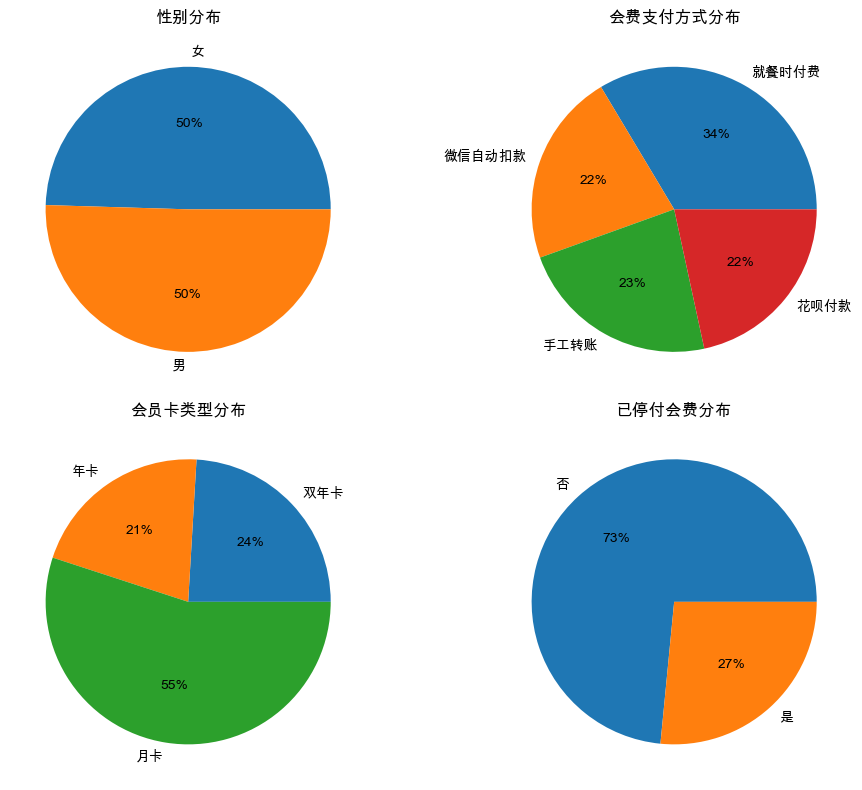

In [7]:
import matplotlib.pyplot as plt #导入绘图工具
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
plt.figure(figsize=(10,8)) #图片大小
plt.subplot(2, 2, 1)
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%', ylabel='')
plt.title('性别分布')  # ✅ 添加标题

plt.subplot(2, 2, 2)
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%', ylabel='')
plt.title('会费支付方式分布')  # ✅ 添加标题

plt.subplot(2, 2, 3)
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%', ylabel='')
plt.title('会员卡类型分布')  # ✅ 添加标题

plt.subplot(2, 2, 4)
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%', ylabel='')
plt.title('已停付会费分布')  # ✅ 添加标题

plt.tight_layout()  # 自动调整间距，防止标题重叠
plt.show()

In [8]:
# 把汉字转换成0、1值
# 使用赋值方式替代 inplace，避免 FutureWarning
df_member['已停付会费'] = df_member['已停付会费'].replace({'是': 1, '否': 0})
df_member['性别'] = df_member['性别'].replace({'女': 0, '男': 1})

/var/folders/6h/jgmm84rs59q33w5k9xh0t60c0000gp/T/ipykernel_45320/1008125979.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_member['已停付会费'] = df_member['已停付会费'].replace({'是': 1, '否': 0})
/var/folders/6h/jgmm84rs59q33w5k9xh0t60c0000gp/T/ipykernel_45320/1008125979.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_member['性别'] = df_member['性别'].replace({'女': 0, '男': 1})


In [9]:
# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'

In [10]:
!pip install lifelines

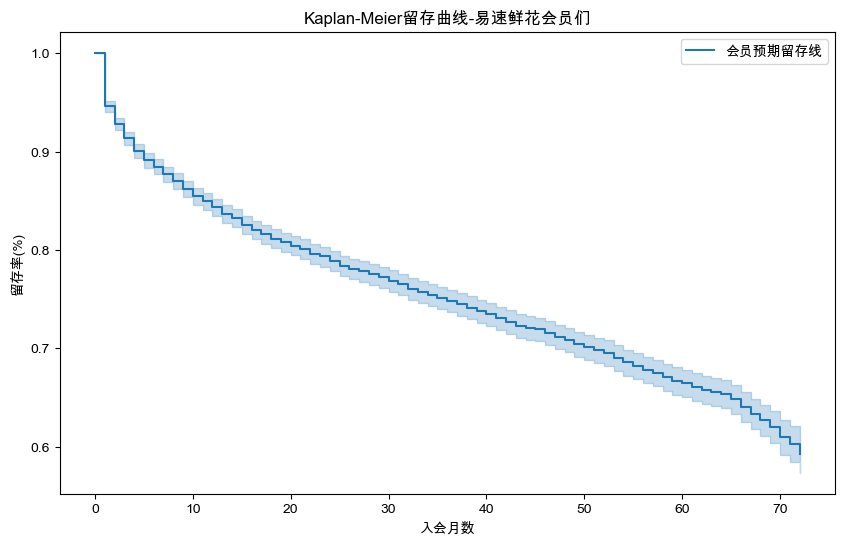

In [ ]:
import lifelines #导入生存分析工具包
kmf = lifelines.KaplanMeierFitter() #创建KMF模型
kmf.fit(df_member['入会月数'], #拟合易速鲜花会员流失数据
        event_obse#rved=df_member['已停付会费'], 
        label='会员预期留存线')
fig, ax = plt.subplots(figsize=(10,6)) #画布
kmf.plot(ax=ax) #绘图
ax.set_title('Kaplan-Meier留存曲线-易速鲜花会员们') #图题
ax.set_xlabel('入会月数') #X轴标签
ax.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

In [12]:
def life_by_cat(feature, t='入会月数', event='已停付会费', df=df_member, ax=None): #定义分类留存曲线函数
    for cat in df[feature].unique(): #遍历类别
        idx = df[feature] == cat #当前类别
        kmf = lifelines.KaplanMeierFitter() #创建KaplanMeier模型
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat) #拟合模型
        kmf.plot(ax=ax, label=cat) #绘图

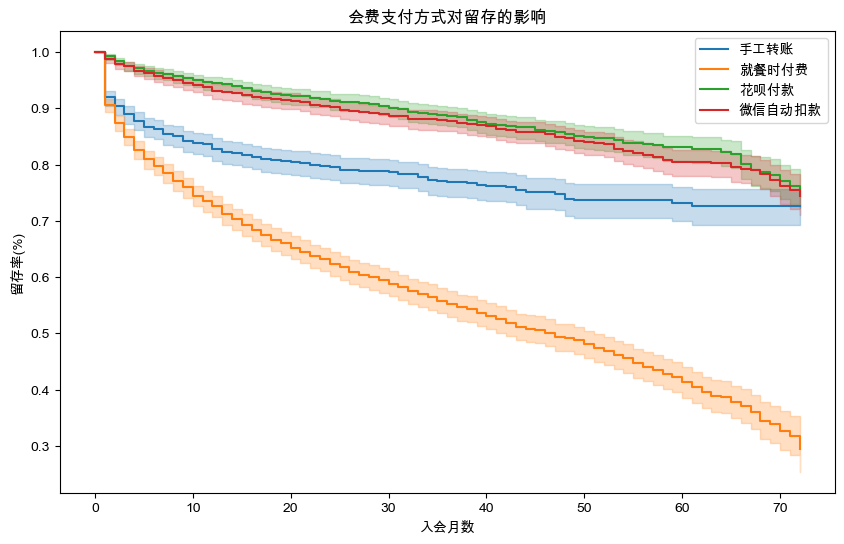

In [13]:
fig_pmt, ax_pmt = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='会费支付方式', ax=ax_pmt) #调用函数
ax_pmt.set_title('会费支付方式对留存的影响') #图题
ax_pmt.set_xlabel('入会月数') #X轴标签
ax_pmt.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

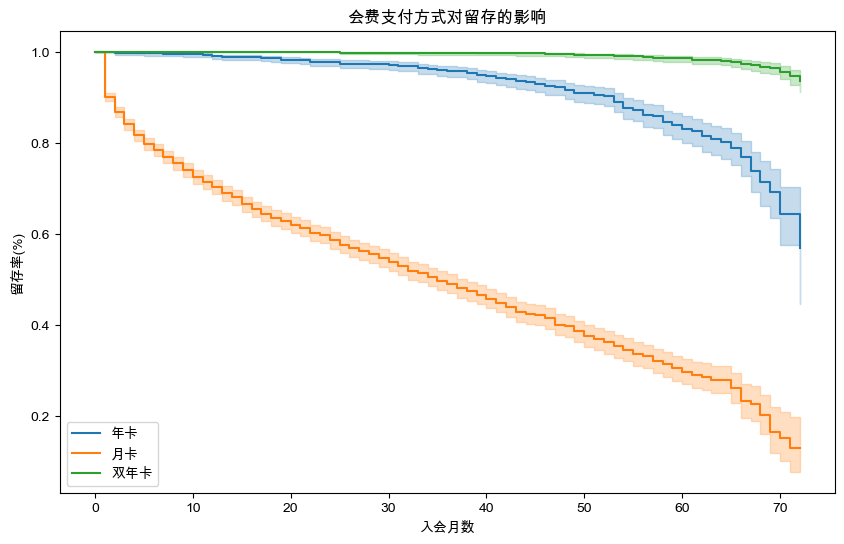

In [14]:
fig_pmt, ax_pmt = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='会员卡类型', ax=ax_pmt) #调用函数
ax_pmt.set_title('会费支付方式对留存的影响') #图题
ax_pmt.set_xlabel('入会月数') #X轴标签
ax_pmt.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

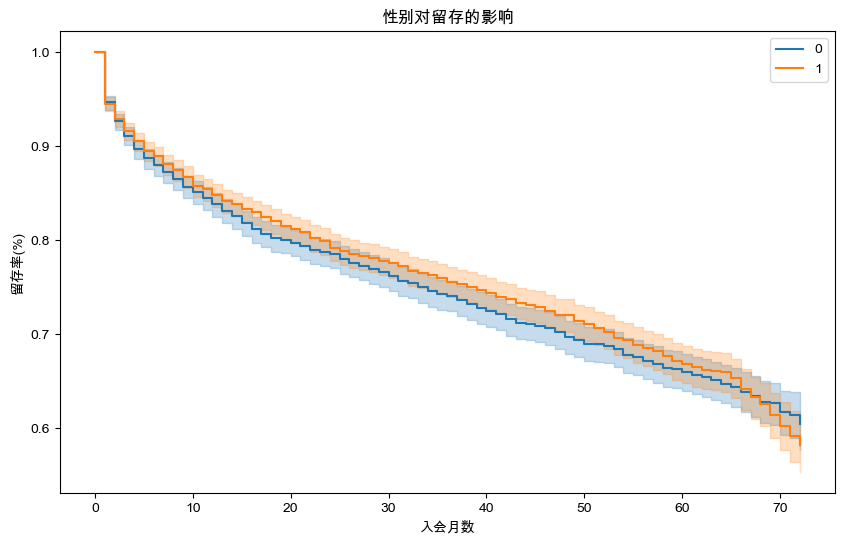

In [15]:
fig_gender, ax_gender = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='性别', ax=ax_gender) #调用函数
ax_gender.set_title('性别对留存的影响') #图题
ax_gender.set_xlabel('入会月数') #X轴标签
ax_gender.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

In [16]:
#把分类字段转换为哑编码
category_features = ['会员卡类型', '会费支付方式'] #要转换的分类的字段
df_member = pd.get_dummies(df_member, #哑变量的个数会比总类别数少1 
                           drop_first=True, #这是因为drop_first=True
                           columns=category_features) #这能够避免回归中的多重共线性问题 
df_member #显示数据

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,True,False,False,True,False
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,False,True,False,True,False
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,False,True,False,False,False
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,False,False,False,True,False


In [17]:
cph = lifelines.CoxPHFitter() #创建CoxPH模型
cph.fit(df_member, duration_col='入会月数', #拟合模型
        event_col='已停付会费', show_progress=False)

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<Figure size 1200x600 with 0 Axes>

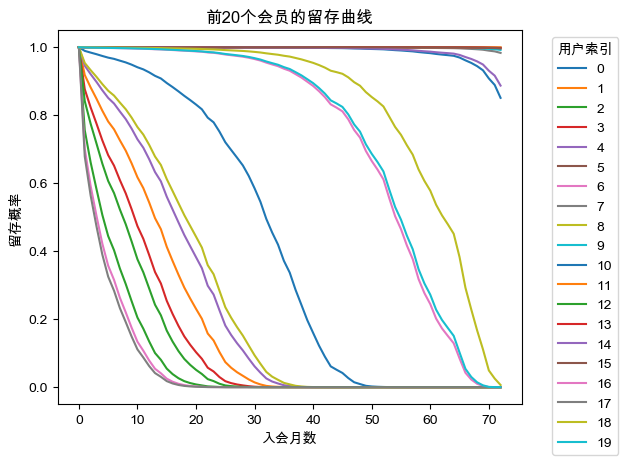

In [18]:
#显示会员生存曲线
# 显示前20个会员的生存曲线
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
cph.predict_survival_function(df_member.iloc[:20]).plot()
plt.title('前20个会员的留存曲线')
plt.xlabel('入会月数')
plt.ylabel('留存概率')
plt.legend(title='用户索引', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: title={'center': '各个特征的留存相关系数'}, xlabel='log(HR) (95% CI)'>

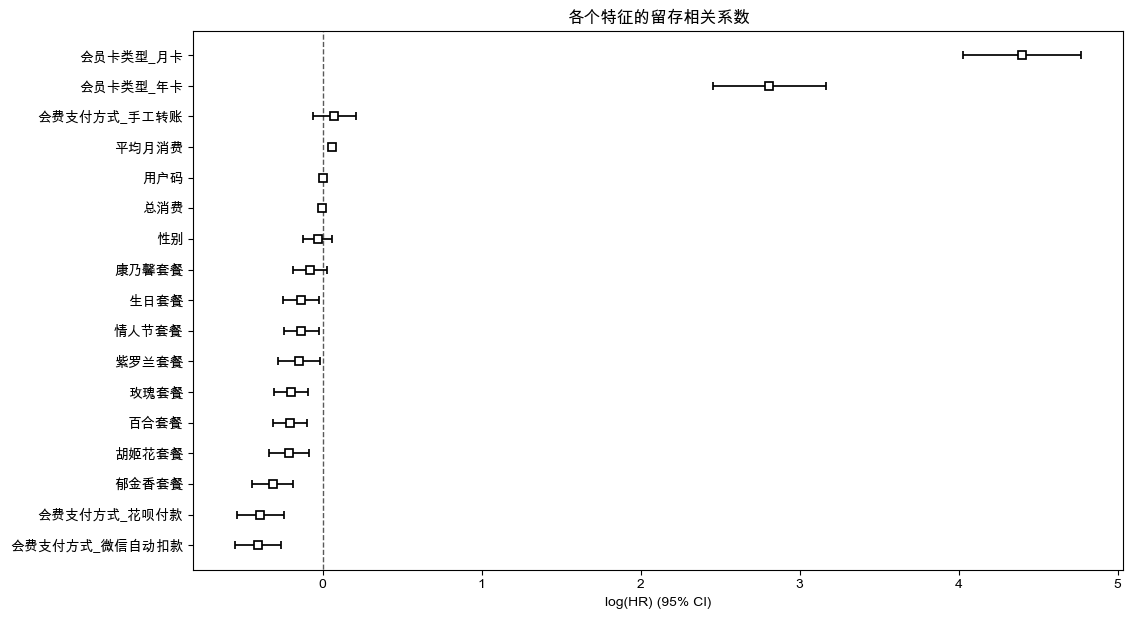

In [19]:
fig, ax = plt.subplots(figsize=(12,7)) #画布
ax.set_title('各个特征的留存相关系数') #图题
cph.plot(ax=ax) #绘图